In [1]:
# Import libraries
import numpy as np
import nltk
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

In [20]:
warnings.filterwarnings('ignore')
color_array = ['r', 'g', 'b', 'y']

In [3]:
# Read train and test dataset
columns = ['id', 'company', 'sentiment', 'tweet']
X_train = pd.read_csv("./Dataset/twitter_training.csv", names=columns, header=None)
X_test = pd.read_csv("./Dataset/twitter_validation.csv", names=columns, header=None)

X_train.drop("id", axis = 1, inplace=True)
X_test.drop("id", axis = 1, inplace=True)

X_train.head()

,company,sentiment,tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
def remove_null(X):
    for col in X.columns:
        if(X[col].isnull().sum() > 0):
            if(col == 'company'):
                X[col].fillna('Others', inplace=True)
            else:
                X.dropna(inplace=True)
    return X

In [5]:
X_train = remove_null(X_train)
X_train.shape

(73996, 3)

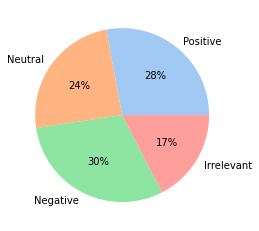

In [6]:
# Number of unique values and their distribution
unique_sentiment = X_train['sentiment'].unique()
colors = sns.color_palette('pastel')

# store count for each sentiment
count = []
temp_df = X_train.groupby('sentiment')
for sentiment in unique_sentiment:
    count.append(temp_df.get_group(sentiment).shape[0])


plt.pie(count, labels = unique_sentiment, colors = colors, autopct='%1.0f%%')
plt.show()

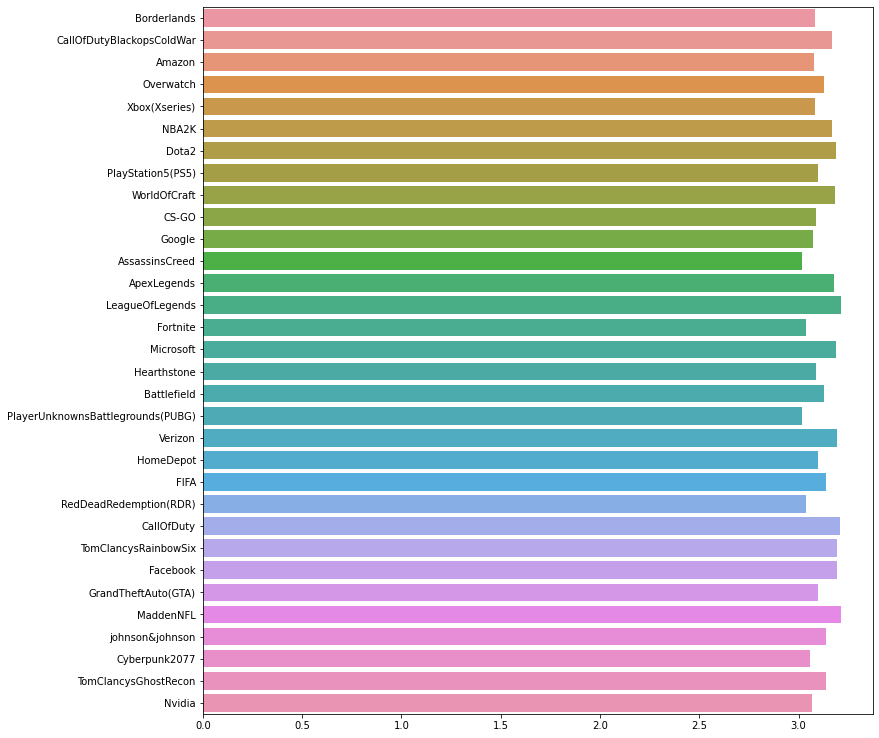

In [7]:
unique_companies = X_train['company'].unique()

temp_df = X_train.groupby('company')
percent = []
for index, company in enumerate(unique_companies):
    percent.append(temp_df.get_group(company).shape[0] * 100 / X_train.shape[0])

plt.figure(figsize=(12,13))
sns.barplot(x = percent, y = unique_companies)
plt.show()

In [8]:
# Tweet length vs sentiment analysis
pos = []
neg = []
irr = []
neu = []
len_per_record = []
num_records = X_train.shape[0]
for index in range(num_records):
    if(X_train['sentiment'].iloc[index] == 'Positive'):
        pos.append(len(X_train['tweet'].iloc[index].split()))
    elif(X_train['sentiment'].iloc[index] == 'Negative'):
        neg.append(len(X_train['tweet'].iloc[index].split()))
    elif(X_train['sentiment'].iloc[index] == 'Irrelevant'):
        irr.append(len(X_train['tweet'].iloc[index].split()))
    else:
        neu.append(len(X_train['tweet'].iloc[index].split()))

combined_len = [pos, neu, neg, irr]

for sentiment_array in combined_len:
    len_per_record.append(sentiment_array)

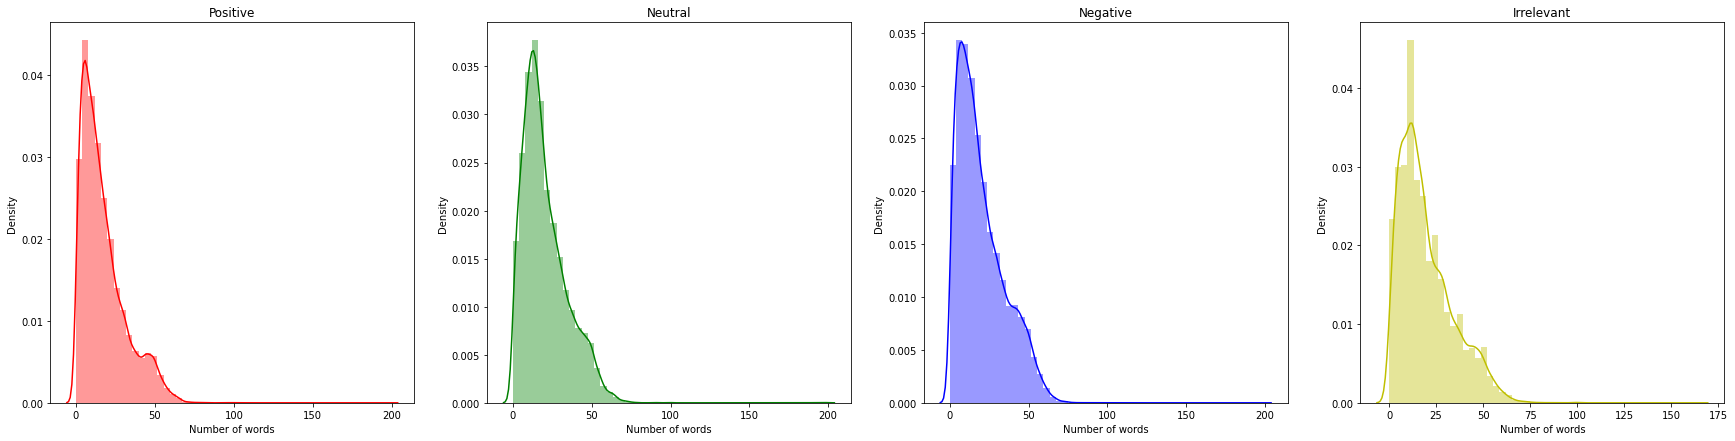

In [26]:
plt.figure(figsize = (30, 7))
nrows = 1; ncols = 4
for index, data in enumerate(combined_len):
    plt.subplot(nrows, ncols, index + 1)
    plt.title(unique_sentiment[index])
    plt.xlabel("Number of words")
    sns.distplot(data, color = color_array[index % 4], kde=True)
plt.show()